In [3]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23914 sha256=a97eb7c7dd31589345193bcf14c2468feae3af515cd38d0b690144982776946f
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8372 sha256=f0418b0641adea79199cf067349685aed87917f45a84f54cebaf58c37eacfefc
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking



In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import pickle as pkl


In [2]:
stocks = input("Enter the Code of a Stock:- ") 
data =  yf.download(stocks, '2010-01-01', '2021-7-01', auto_adjust=True) 
data.head()

Enter the Code of a Stock:- SI=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2009-12-31,16.822001,17.020000,16.822001,16.822001,27
2010-01-04,17.440001,17.440001,16.870001,17.440001,28
2010-01-05,17.781000,17.820000,17.575001,17.781000,38
2010-01-06,18.163000,18.190001,17.840000,18.163000,19
2010-01-07,18.333000,18.333000,18.090000,18.333000,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2868 entries, 2009-12-31 to 2021-06-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2868 non-null   float64
 1   High    2868 non-null   float64
 2   Low     2868 non-null   float64
 3   Close   2868 non-null   float64
 4   Volume  2868 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 134.4 KB


In [4]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<AxesSubplot:>

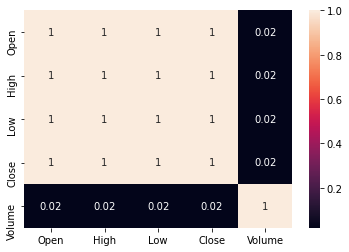

In [5]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

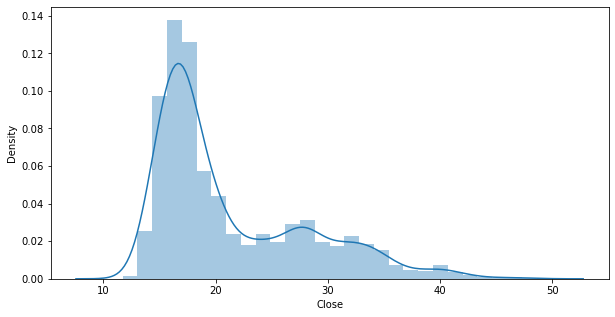

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(data['Close'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

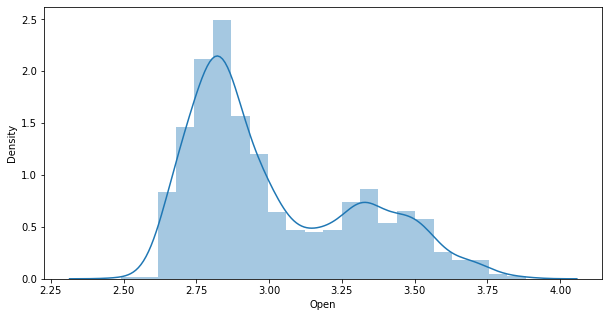

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(data['Open']))


In [8]:
X = data.drop("Close",axis=1)
y = data["Close"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape,y_test.shape)

(2868, 4) (2294, 4) (574, 4)
(2868,) (2294,) (574,)


In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

array([2051.5])

In [12]:
y_pred =regressor.predict(X_test)

In [13]:
from sklearn import metrics
r2_test = metrics.r2_score(y_test, y_pred)
r2_test

0.9984620872971558

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

0.07332102777589183

In [15]:
rmse = np.sqrt(mse)
rmse

0.2707785585601117

In [16]:
metrics.mean_absolute_error(y_test, y_pred)

0.1445208326864741

In [17]:
def calculated_metrics(y_test, y_pred): 
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scores = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("r2_score:- ", r2_scores)

In [18]:
calculated_metrics(y_test,y_pred)

MSE:-  0.07332102777589183
RMSE:-  0.2707785585601117
r2_score:-  0.9984620872971558


In [19]:
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
'''
from sklearn.svm import SVR

# creating the model
svr = SVR()

# feeding the training data to the model
svr.fit(X_train, y_train)

# predicting the test set results
y_pred_svr = svr.predict(X_test)
svr.score(X_train,y_train)

-0.19972898667660122

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred =reg.predict(X_test)

In [33]:
calculated_metrics(y_test,y_pred)

MSE:-  0.02821997478061322
RMSE:-  0.16798801975323485
r2_score:-  0.9994080844335448


In [34]:
with open ('price.pkl' , 'wb') as f:
    pkl.dump(regressor,f)

In [35]:
model = pkl.load(open('price.pkl','rb'))

In [37]:
regressor.predict([[17.781000,17.820000,17.575001,38]])

array([17.66255724])

In [38]:
regressor.predict([[18.333000,18.333000,18.090000,7]])

array([18.15759787])